In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np

# torch.manual_seed(1)

EPOCH = 2
LR = 0.001
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
print(train_data.train_data.shape)

train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.train_labels
print(train_x.shape)

test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.test_labels[:2000]

C:\Users\Jian\anaconda3\envs\virenv\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Jian\anaconda3\envs\virenv\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\Jian\anaconda3\envs\virenv\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Jian\anaconda3\envs\virenv\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


In [4]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [2]:
import matplotlib.pyplot as plt

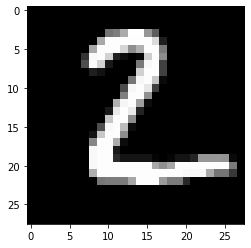

In [5]:
plt.imshow(test_x[1,0,:,:].numpy(), 'gray')

In [4]:
test_y[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [6]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)

        output = x
        return output


fc = FC()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)

        output = fc(b_x)
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.3205 | test accuracy: 0.125
Epoch:  0 | train loss: 1.1530 | test accuracy: 0.661
Epoch:  0 | train loss: 0.7352 | test accuracy: 0.775
Epoch:  0 | train loss: 0.5475 | test accuracy: 0.799
Epoch:  0 | train loss: 0.2458 | test accuracy: 0.828
Epoch:  0 | train loss: 0.2806 | test accuracy: 0.848
Epoch:  0 | train loss: 0.3448 | test accuracy: 0.858
Epoch:  0 | train loss: 0.2467 | test accuracy: 0.881
Epoch:  1 | train loss: 0.3167 | test accuracy: 0.877
Epoch:  1 | train loss: 0.1782 | test accuracy: 0.888
Epoch:  1 | train loss: 0.4520 | test accuracy: 0.898
Epoch:  1 | train loss: 0.3155 | test accuracy: 0.887
Epoch:  1 | train loss: 0.2659 | test accuracy: 0.895
Epoch:  1 | train loss: 0.2996 | test accuracy: 0.903
Epoch:  1 | train loss: 0.2966 | test accuracy: 0.908
Epoch:  1 | train loss: 0.3632 | test accuracy: 0.901
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [16]:
test_output = fc(test_x[:1])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

tensor(7) prediction number
tensor([7]) real number


In [21]:
test_output

tensor([[-1.7228, -5.7907,  3.7918,  4.6222, -2.6630,  0.7286,  0.8211, 11.8054,
          0.9796,  3.1643]], grad_fn=<AddmmBackward>)

In [18]:
test_x[:1].shape

torch.Size([1, 1, 28, 28])

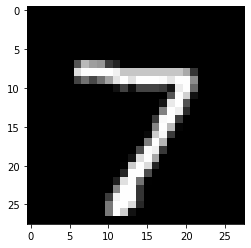

In [19]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')

In [2]:
import torch
torch.eye(10)
0, 1, 2, ..., 9 

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])